In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/content/neet_dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data= pd.read_csv("/content/neet_dataset.csv")

In [5]:
data.head()

,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,user_url,tweet,length_of_tweet
0,2020-10-31 14:10:28,141,Twitter for Android,1.250290e+18,Rumi,NaN,14,180,NaN,False,NaN,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139
1,2020-10-31 14:10:11,1,Twitter for iPhone,5.705949e+07,Tom Bewick,"Proud dad of three & cat, @SussexCCC fan. CEO ...",2314,3002,Sussex,False,https://t.co/w6QEi0PBzP,\xf0\x9f\x91\x87This is a really important iss...,140
2,2020-10-31 14:09:48,141,Twitter Web App,1.016023e+09,Lemonade,"Wisdom is knowing the right path to take, Inte...",285,1013,"Bedfordview, South Africa",False,NaN,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139
3,2020-10-31 14:09:41,141,Twitter for Android,1.085820e+18,The Rus,NaN,147,467,NaN,False,NaN,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139
4,2020-10-31 14:09:22,0,Twitter for Android,1.227500e+18,Sakshi Yadav,it's not my attitude it's my style,2,24,NaN,False,NaN,@RomeshSabharwal @ArvindKejriwal Romesh Sabhar...,140


In [6]:
data.tail()

,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,user_url,tweet,length_of_tweet
47376,2020-10-30 15:29:35,0,Twitter for Android,1.168840e+18,neet_fad_do,Bhola sa chora,254,513,NaN,False,NaN,Friend Request \xe2\x9d\x8c\nAcid request \xe2...,56
47377,2020-10-30 15:29:35,1700,Twitter for Android,1.696616e+09,Yarutai - Garbage NEET,Random person who likes drawing (but not a \nl...,23,754,NaN,False,NaN,RT @Telepeturtle: those are some pretty nice s...,74
47378,2020-10-30 15:28:59,167,Twitter for Android,1.313330e+18,Raushan,NaN,2,2,NaN,False,NaN,"RT @KhushnumaKashm1: (8/n)\n18 year old, Basit...",140
47379,2020-10-30 15:28:37,270,Twitter for Android,1.161550e+18,Vijaykant,Finding the enemies of India \xf0\x9f\x87\xae\...,140,1309,NaN,False,NaN,RT @OpIndia_com: Yogi Adityanath asks chief se...,140
47380,2020-10-30 15:28:14,0,Twitter for Android,1.211810e+18,Icarus,404: \xd8\xaf\xd9\x8a\xd8\xa7\xd9\x86\xd8\xa9 ...,16,45,your friendly local enby,False,NaN,i hate talking to people from my department bu...,139


In [7]:
data.sample(5)


,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,user_url,tweet,length_of_tweet
12061,2020-10-27 15:30:37,0,Twitter Web App,1.318150e+18,Tyroki Official,"I'm Tyroki, Lord of Chaos, Prince of Destructi...",1,8,NaN,False,NaN,@W0lffighter @gawrgura As someone who is also ...,140
21342,2020-10-31 09:19:51,7,Twitter for Android,1.317450e+18,\xe8\x8a\xa6,\xe3\x82\x8d\xe3\x81\xa7\xe3\x81\x99\xef\xbc\x...,47,39,\xe3\x83\x84\xe3\x82\xa4\xe3\x83\x95\xe3\x82\x...,False,https://t.co/bKpIasR6Jk,RT @403_pine2: nice to NEET you ! https://t.co...,57
15717,2020-10-26 01:09:32,0,Twitter for Android,1.258760e+18,Kapil Dangi,NaN,91,57,NaN,False,NaN,Halogen derivatives-23\nhttps://t.co/oR7psrdVh...,140
27235,2020-10-29 07:22:15,5,Twitter Web App,7.101570e+17,Anonymous Seeker,Apni Hi Talash Me,5755,1817,Somewhere in Aryavarta,False,NaN,RT @ShuchiRecites: Is there any NEET aspirant ...,119
25383,2020-10-29 20:46:22,0,Twitter Web App,1.295220e+18,\xe2\x9a\x9c\xef\xb8\x8f\xf0\x9f\x93\x96\xf0\x...,danmei & fic read/rant account \xe2\x98\x84\xe...,1,39,18+,False,NaN,THE HELL SONG IS MAYDAY AND WHY WOULD NEET SQQ...,69


In [8]:
print("Shape of the dataset : ", data.shape)

Shape of the dataset :  (47381, 13)


In [9]:
print("Column Names : \n"+'-'*25)
print(data.columns)

Column Names : 
-------------------------
Index(['created_at', 'retweet_count', 'source', 'user_id', 'user_name',
       'user_description', 'user_follower_count', 'user_friends_count',
       'user_location', 'user_verified', 'user_url', 'tweet',
       'length_of_tweet'],
      dtype='object')


In [10]:
print("Unique values in every column \n"+'-'*25)
for i in data.columns:
    print("\t"+i+" = ",len(set(data[i])))

Unique values in every column 
-------------------------
	created_at =  30696
	retweet_count =  1046
	source =  173
	user_id =  15326
	user_name =  17558
	user_description =  13857
	user_follower_count =  3952
	user_friends_count =  3050
	user_location =  5446
	user_verified =  2
	user_url =  3473
	tweet =  16720
	length_of_tweet =  148


In [11]:
data.describe()

,retweet_count,user_id,user_follower_count,user_friends_count,length_of_tweet
count,47381.000000,4.738100e+04,4.738100e+04,47381.000000,47381.000000
mean,331.769190,7.851397e+17,2.465465e+04,681.960322,120.293050
std,5146.699757,5.664197e+17,4.153120e+05,2897.910542,35.647986
min,0.000000,1.516830e+05,0.000000e+00,0.000000,4.000000
25%,0.000000,2.906389e+09,1.900000e+01,41.000000,114.000000
50%,6.000000,1.071030e+18,1.200000e+02,218.000000,140.000000
75%,150.000000,1.283820e+18,5.960000e+02,705.000000,140.000000
max,614304.000000,1.325420e+18,1.393436e+07,490801.000000,158.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47381 entries, 0 to 47380
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_at           47381 non-null  object 
 1   retweet_count        47381 non-null  int64  
 2   source               47362 non-null  object 
 3   user_id              47381 non-null  float64
 4   user_name            47380 non-null  object 
 5   user_description     36510 non-null  object 
 6   user_follower_count  47381 non-null  int64  
 7   user_friends_count   47381 non-null  int64  
 8   user_location        26247 non-null  object 
 9   user_verified        47381 non-null  bool   
 10  user_url             9280 non-null   object 
 11  tweet                47381 non-null  object 
 12  length_of_tweet      47381 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 4.4+ MB


In [13]:
data.isnull().sum()

created_at                 0
retweet_count              0
source                    19
user_id                    0
user_name                  1
user_description       10871
user_follower_count        0
user_friends_count         0
user_location          21134
user_verified              0
user_url               38101
tweet                      0
length_of_tweet            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


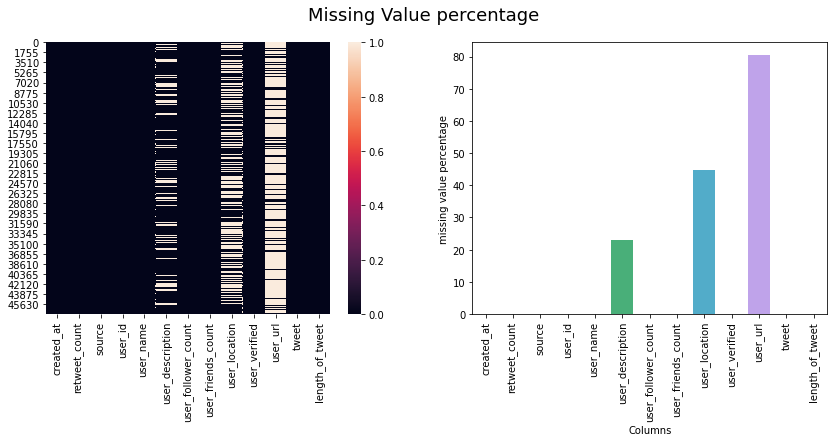

In [14]:
nullCount = ((data.isna().sum() / data.shape[0])* 100).reset_index().rename(columns = {"index": "Columns", 0: "missing value percentage"})
fig,axes = plt.subplots(1,2,figsize=(14,5))
plt.suptitle("Missing Value percentage",fontsize=18)
sns.heatmap(data.isna(),ax=axes[0])
sns.barplot(nullCount['Columns'],nullCount['missing value percentage'],ax=axes[1])
plt.xticks(rotation=90)
plt.show()

In [15]:
# replace nan of user_location with INDIA
data['user_location'].fillna('India',inplace=True)
# replace nan of user_description with NO DESCRIPTION
data['user_description'].fillna('No Description',inplace=True)
#check for all null values
data.isnull().sum()

created_at                 0
retweet_count              0
source                    19
user_id                    0
user_name                  1
user_description           0
user_follower_count        0
user_friends_count         0
user_location              0
user_verified              0
user_url               38101
tweet                      0
length_of_tweet            0
dtype: int64

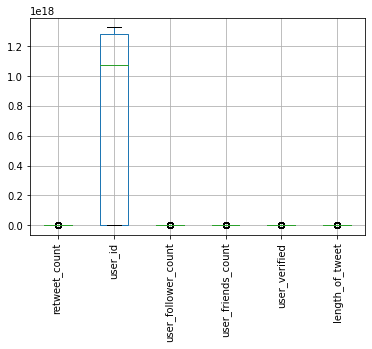

In [16]:
data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [17]:
# splitting date and time
df = data
date=[]
time=[]
for i in data['created_at']:
    date.append(i.split(' ')[0])
    time.append(i.split(' ')[1])
df['created_on']=date
df['created_at']=time
df.head(3)

,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,user_url,tweet,length_of_tweet,created_on
0,14:10:28,141,Twitter for Android,1.250290e+18,Rumi,No Description,14,180,India,False,NaN,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139,2020-10-31
1,14:10:11,1,Twitter for iPhone,5.705949e+07,Tom Bewick,"Proud dad of three & cat, @SussexCCC fan. CEO ...",2314,3002,Sussex,False,https://t.co/w6QEi0PBzP,\xf0\x9f\x91\x87This is a really important iss...,140,2020-10-31
2,14:09:48,141,Twitter Web App,1.016023e+09,Lemonade,"Wisdom is knowing the right path to take, Inte...",285,1013,"Bedfordview, South Africa",False,NaN,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139,2020-10-31


In [18]:
try:
    data.drop('user_url',axis=1,inplace=True)
except:
    print("URL dropped")

In [19]:
hashtags = []
hashtags_count = []
person_tags = []
person_tags_count = []
for sen in data['tweet']:
    hashes = []
    tags = []
    sen_list = sen.split(' ')
    for word in sen_list:
        if len(word)>1:
            if word[0]=='#':
                hashes.append(word)
            if word[0]=='@':
                tags.append(word)
    hashtags.append(tuple(hashes))#converted to tuple as tuple is a hashable object
    person_tags.append(tuple(tags))
    hashtags_count.append(len(hashes))
    person_tags_count.append(len(tags))
      
len(person_tags),len(hashtags),len(hashtags_count),len(person_tags_count)

(47381, 47381, 47381, 47381)

In [20]:
df['tagged_persons'] = tuple(person_tags)
df['hashtags'] = tuple(hashtags)
df['hashtags_count'] = hashtags_count
df['tagged_persons_count'] = person_tags_count
df.head(5)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,tweet,length_of_tweet,created_on,tagged_persons,hashtags,hashtags_count,tagged_persons_count
0,14:10:28,141,Twitter for Android,1.250290e+18,Rumi,No Description,14,180,India,False,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139,2020-10-31,"(@Kwa_Mamkhize:,)","(#KwaMamkhize,)",1,1
1,14:10:11,1,Twitter for iPhone,5.705949e+07,Tom Bewick,"Proud dad of three & cat, @SussexCCC fan. CEO ...",2314,3002,Sussex,False,\xf0\x9f\x91\x87This is a really important iss...,140,2020-10-31,(),(),0,0
2,14:09:48,141,Twitter Web App,1.016023e+09,Lemonade,"Wisdom is knowing the right path to take, Inte...",285,1013,"Bedfordview, South Africa",False,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139,2020-10-31,"(@Kwa_Mamkhize:,)","(#KwaMamkhize,)",1,1
3,14:09:41,141,Twitter for Android,1.085820e+18,The Rus,No Description,147,467,India,False,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139,2020-10-31,"(@Kwa_Mamkhize:,)","(#KwaMamkhize,)",1,1
4,14:09:22,0,Twitter for Android,1.227500e+18,Sakshi Yadav,it's not my attitude it's my style,2,24,India,False,@RomeshSabharwal @ArvindKejriwal Romesh Sabhar...,140,2020-10-31,"(@RomeshSabharwal, @ArvindKejriwal)",(),0,2


In [21]:
print("Our dataset has {} persons tagged".format(df['tagged_persons_count'].sum()))
print("In our dataset users used {} hashtags ".format(df['hashtags_count'].sum()))

Our dataset has 50702 persons tagged
In our dataset users used 21096 hashtags 


In [35]:
df = df[['id', 'user_id', 'user_name','user_description', 'user_follower_count', 'user_friends_count',
              'user_location', 'user_verified', 'tweet', 'length_of_tweet', 'retweet_count', 'source',
              'created_at',  'created_on', 'tagged_persons', 'hashtags', 'hashtags_count',
              'tagged_persons_count']]

KeyError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [23]:
df.head(3)

,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,tweet,length_of_tweet,created_on,tagged_persons,hashtags,hashtags_count,tagged_persons_count
0,14:10:28,141,Twitter for Android,1.250290e+18,Rumi,No Description,14,180,India,False,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139,2020-10-31,"(@Kwa_Mamkhize:,)","(#KwaMamkhize,)",1,1
1,14:10:11,1,Twitter for iPhone,5.705949e+07,Tom Bewick,"Proud dad of three & cat, @SussexCCC fan. CEO ...",2314,3002,Sussex,False,\xf0\x9f\x91\x87This is a really important iss...,140,2020-10-31,(),(),0,0
2,14:09:48,141,Twitter Web App,1.016023e+09,Lemonade,"Wisdom is knowing the right path to take, Inte...",285,1013,"Bedfordview, South Africa",False,RT @Kwa_Mamkhize: I am giving away R5K to 100 ...,139,2020-10-31,"(@Kwa_Mamkhize:,)","(#KwaMamkhize,)",1,1


In [25]:
print("The new shape of our Data is : ",df.shape)



The new shape of our Data is :  (47381, 17)


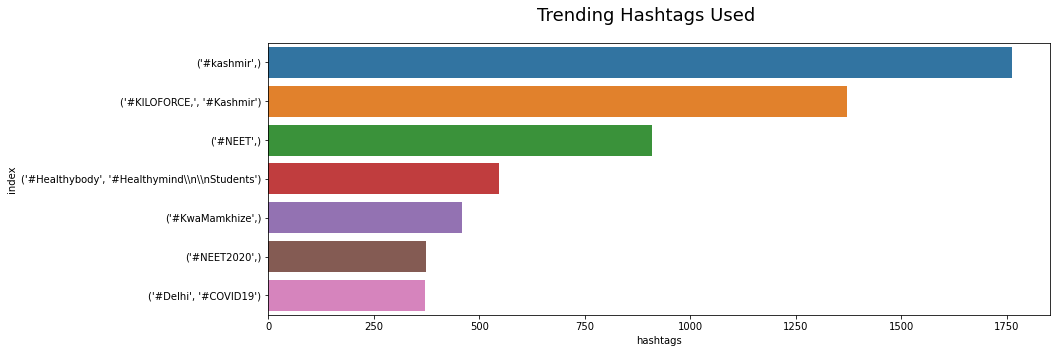

In [26]:
hashData = df.hashtags.value_counts()[1:8].reset_index()
fig,axes = plt.subplots(1,1,figsize=(14,5))
plt.suptitle("Trending Hashtags Used",fontsize=18)
sns.barplot(data = hashData , y='index',x='hashtags')
plt.show()


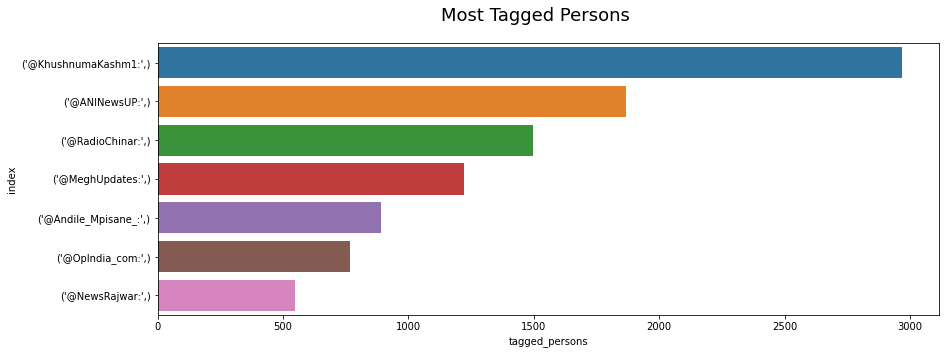

In [27]:
tagData = df.tagged_persons.value_counts()[1:8].reset_index()
fig,axes = plt.subplots(1,1,figsize=(14,5))
plt.suptitle("Most Tagged Persons",fontsize=18)
sns.barplot(data = tagData , y='index',x='tagged_persons')
plt.show()


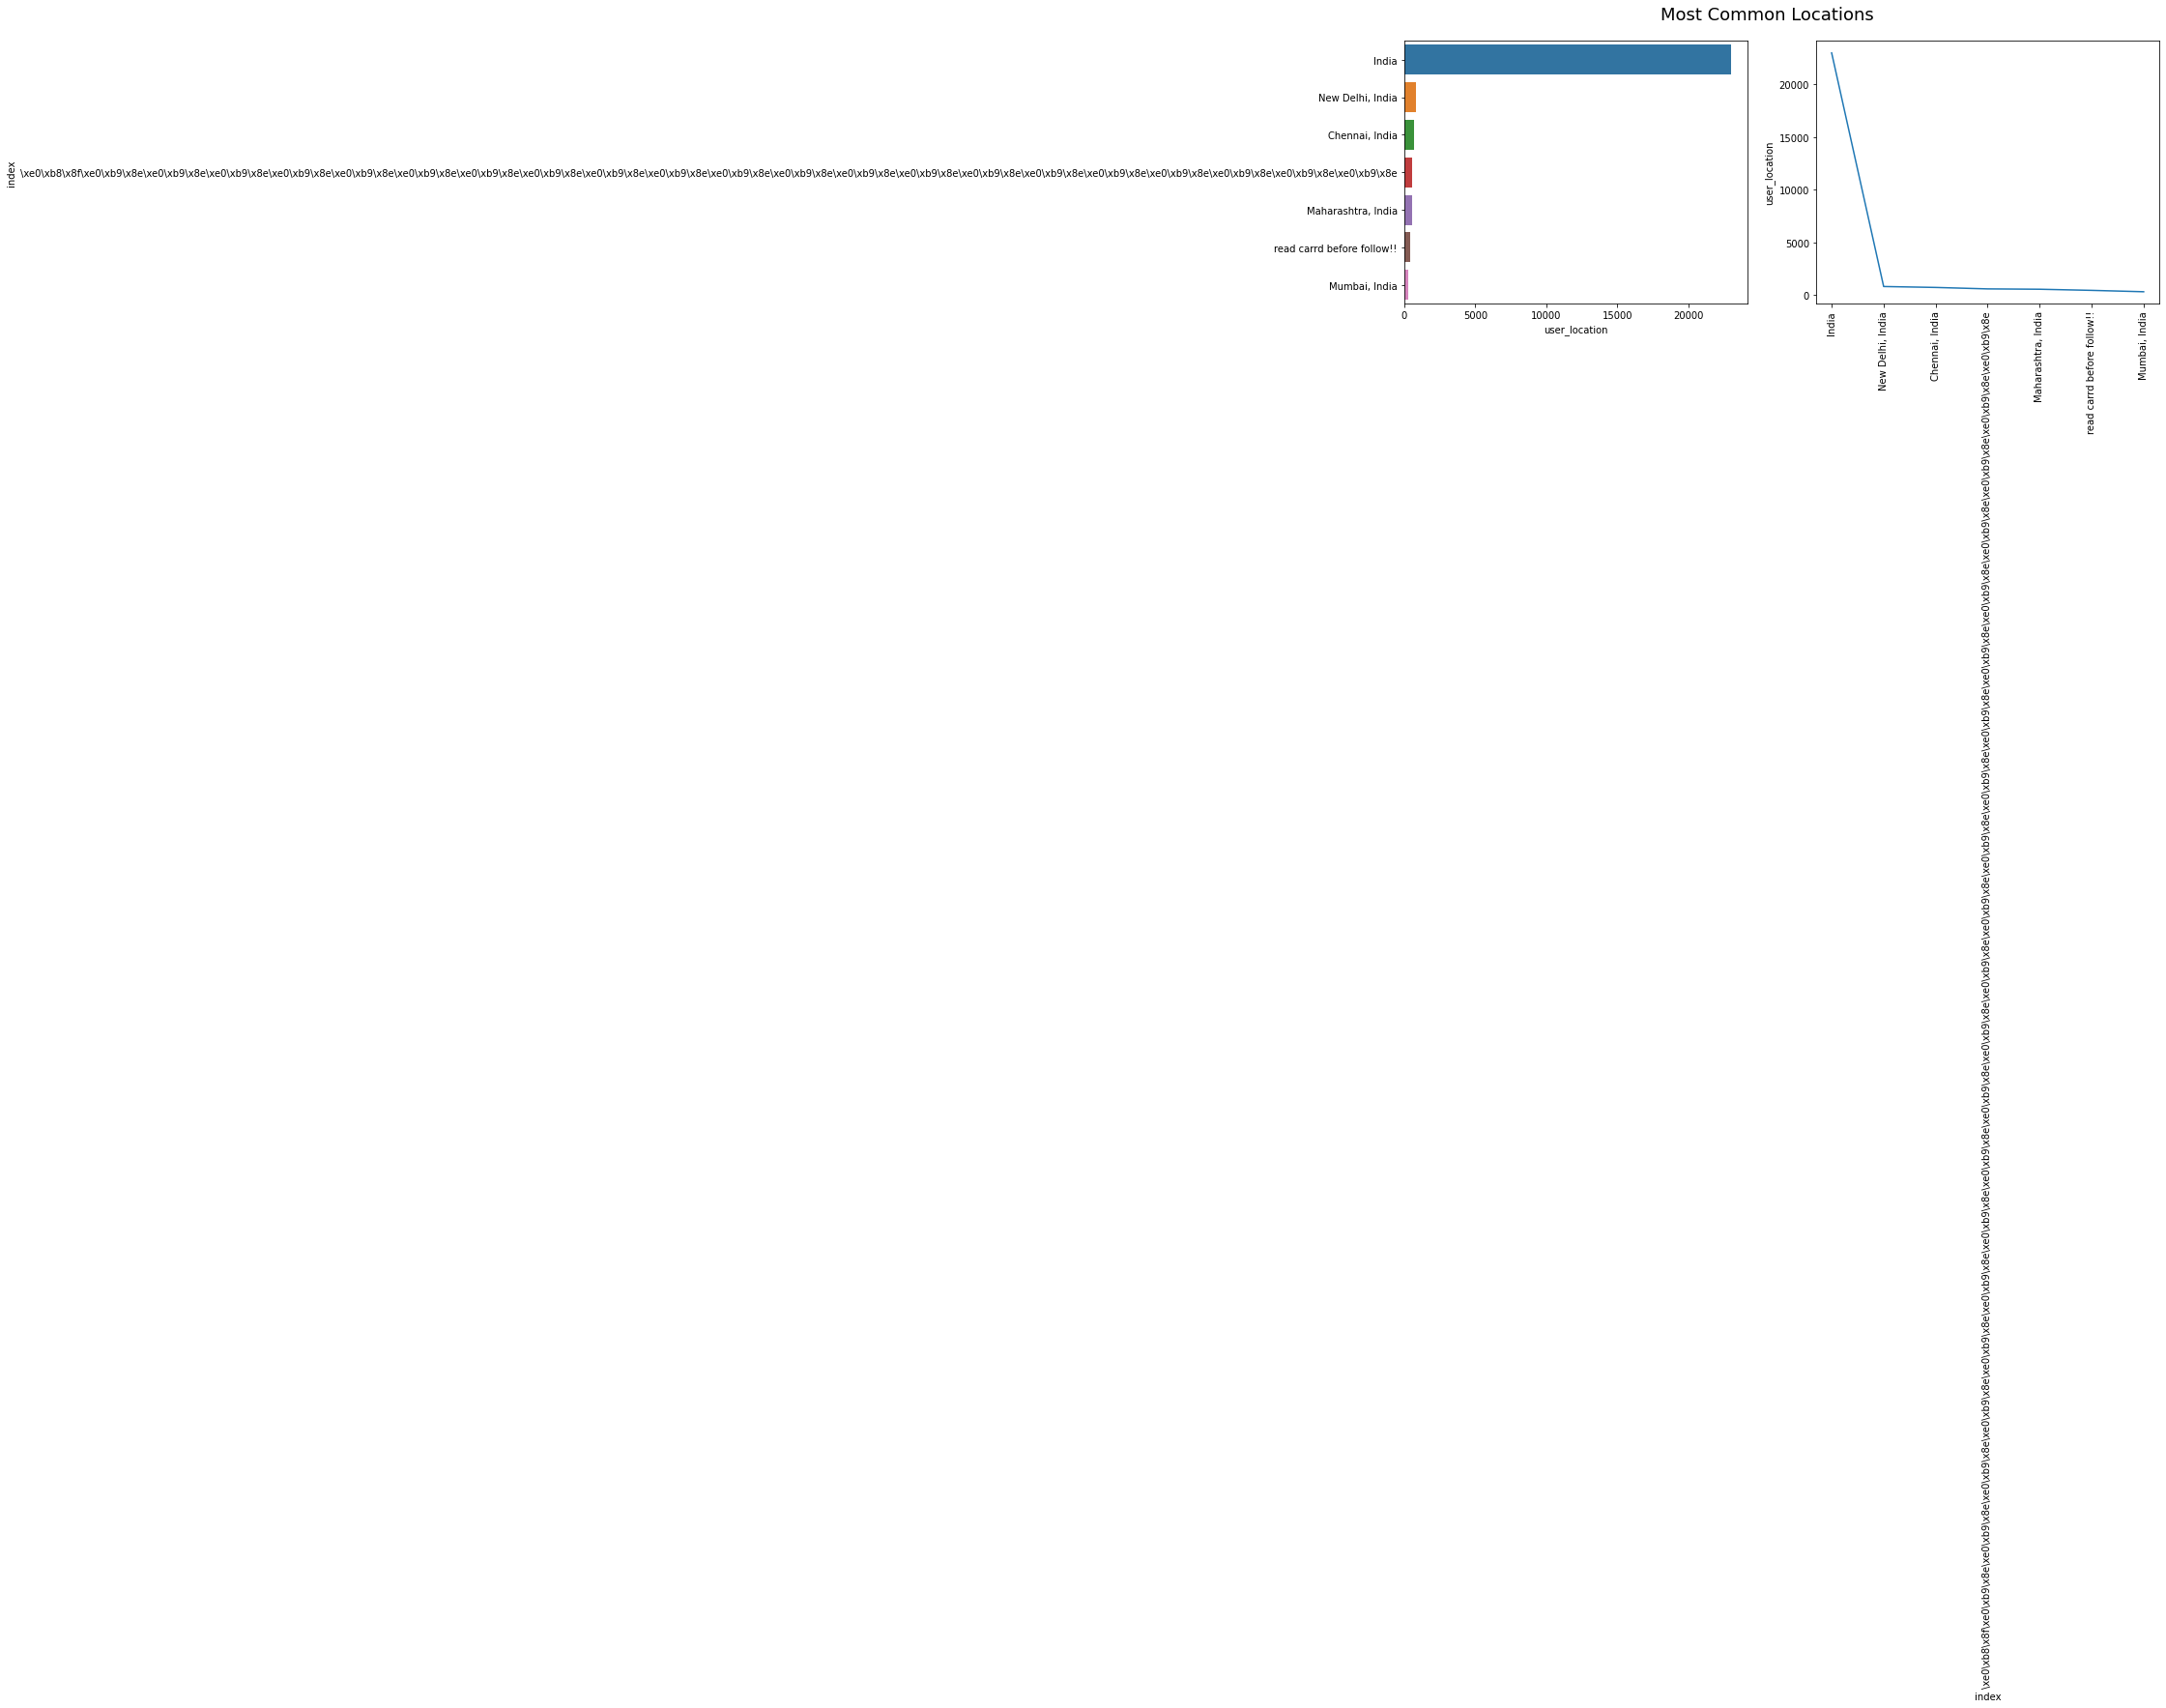

In [28]:
df = data.user_location.value_counts()[:7].reset_index()
fig,axes = plt.subplots(1,2,figsize=(14,5))
plt.suptitle("Most Common Locations ",fontsize=18)
sns.lineplot(x=df["index"], y = df["user_location"],ax=axes[1]) 
sns.barplot(y=df["index"], x = df["user_location"],ax=axes[0]) 
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


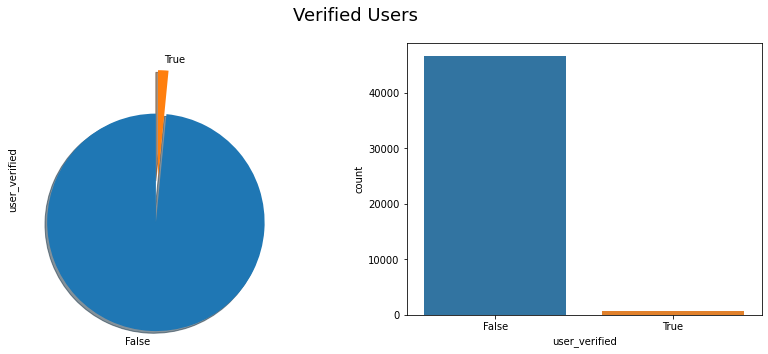

In [29]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
plt.suptitle("Verified Users ",fontsize=18)
explode = (0.4, 0)
sns.countplot(data["user_verified"],ax=axes[1])
data['user_verified'].value_counts().plot.pie(explode=explode,shadow=True, startangle=90,ax=axes[0])
plt.show()

In [30]:
retweeted=[]
for i in data.retweet_count:
    if i>0:
        retweeted.append('Retweeted')
    else:
        retweeted.append('Not Retweeted')

retweeted=pd.Series(retweeted)
uniq = data.retweet_count.unique()
uniq

array([ 141,    1,    0, ...,  324, 1700,  270])

ValueError: ignored

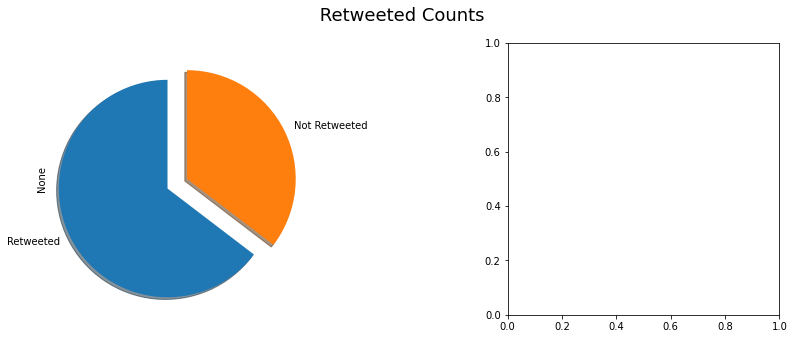

In [32]:
explode = (0, 0.3,0.3, 0.3,0.3, 0.3,0.3, 0.3,0.3,0.3,0.3)
labels = [0,1,5,2,102,6,4,31,3,13,20]
fig,axes = plt.subplots(1,2,figsize=(15,5))
plt.suptitle(" Retweeted Counts ",fontsize=18)
retweeted.value_counts().plot.pie(explode=(0.2,0),shadow=True, startangle=90,ax=axes[0])
plt.pie(data.retweet_count.value_counts(),explode= explode,startangle=30, labels= labels,shadow=True)
plt.show()

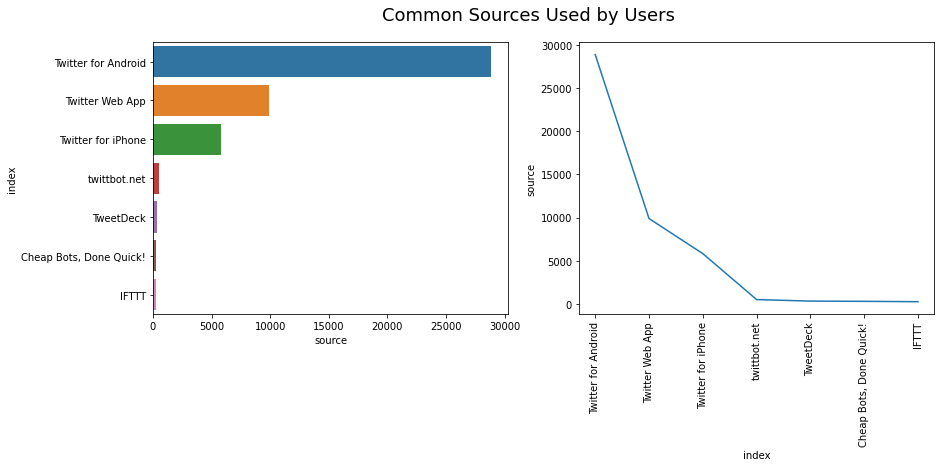

In [33]:
df = data.source.value_counts()[:7].reset_index()
fig,axes = plt.subplots(1,2,figsize=(14,5))
plt.suptitle("Common Sources Used by Users ",fontsize=18)
sns.barplot(y=df["index"], x = df["source"],ax=axes[0]) 
sns.lineplot(x=df["index"], y = df["source"],ax=axes[1]) 
plt.xticks(rotation=90)
plt.show()